In [ ]:
import numpy as np
from matplotlib import pyplot as plt

**Grover's search algorithm**

Yanofsky and Mannucci, Quantum Computing for Computer Scientists. Cambridge University Press 2020.

> Given an unordered array of $m$ elements, find a particular element.
>
> ... in the worst case, this takes $m$ queries.
> On average, we will find the desired element in $m/2$ queries.

> Lov Grover's search algorithm does the job in $\sqrt{m}$ queries.
> ... Grover's algorithm has many applications to database theory and other areas.

# The problem

> Given a function $f: \{0, 1\}^n \rightarrow \{0, 1\}$
> and there exists exactly one binary string $\mathbf{x}_0$ such that
>
> \begin{align}
 f(\mathbf{x}) = \left\{
 \begin{array}
 \; 1 , \mbox{ if } \mathbf{x} = \mathbf{x}_0 , \\
 0 , \mbox{ if } \mathbf{x} \neq \mathbf{x}_0 .
 \end{array}
 \right.
 \end{align}
>
> Find the $\mathbf{x}_0$.

Example, $n = 3$

Given $f(\mathbf{x})$ (we cannot see inside $f$), find $\mathbf{x}$ that makes $f(\mathbf{x}) = 1$.

Check each one:

* $f(\mbox{`000'}) = 0$
* $f(\mbox{`001'}) = 0$
* $f(\mbox{`010'}) = 0$
* $f(\mbox{`011'}) = 0$
* $f(\mbox{`100'}) = 1$ $\Rightarrow$ Found it!

The answer is $\mathbf{x} = \mbox{`100'}$

and we expended 5 queries to have done it.

> Classically, in the worst case, we would have to eavaluate all $2^n$ binary strings to find the desired $\mathbf{x}_0$.
> Grover's algorithm will demand only $\sqrt{2^n} = 2^{\frac{n}{2}}$ evaluations.

**Q**: For 64-bit case, on average, how many queries we may do to find the answer classically?

**A**: It is $\frac{m}{2} = \frac{2^{64}}{2} = 2^{63}$.

In [ ]:
2**63

9223372036854775808

**Q**: For 64-bit case, how many queries we may do to find the answer with Grover's algorithm?

**A**: It is $\sqrt{m} = \sqrt{2^{64}} = 2^{32}$.

In [ ]:
2**32

4294967296

Note: it is nice, but to implement Grover algorithm on a quantum computer,
due to its probabilistic nature, noise, and error associated, we have to repeat it many times, e.g., 1000 times.

That makes it

$2^{32} * 1000$ queries.

In [ ]:
2**32 * 1000

4294967296000

Not that great, but still some gain!

The benefit is ok, but how is it done then?

# The algorithm

> Step 1. Start with a state $| \mathbf{0} \rangle$
>
> Step 2. Apply $H^{\otimes n}$
>
> Step 3. Repeat $\sqrt{2^n}$ times
>
>   * Step 3a. Apply the phase inversion operation: $U_f (I \otimes H)$
>   * Step 3b. Apply the inversion about the mean operation: $-I + 2 A$
>
> Step 4. Measure the qubits.

![image.png](attachment:eca55548-5cf9-4678-b258-f71311189f0e.png)

# The explanation

The mysterious function $f$ is represented as the unitary matrix $U_f$ that take
$| \mathbf{x}, y \rangle$ to $| \mathbf{x}, f(\mathbf{x}) \oplus y \rangle$.

Note $\oplus$ represents controlled-NOT operation:

\begin{align}
a \oplus b =
\left\{
\begin{array}
         \; b , \mbox{ if } a = 0 , \\
         \bar{b}, \mbox{ if } a = 1 .
\end{array}
\right.
\end{align}

> E.g., for $n = 2$, if $f$ is to pick out the binary string ```10```, then $U_f$ looks like
>
> ![image.png](attachment:f910c9c8-a996-44d2-9486-c36c59106341.png)

> For $|\mathbf{x}, y \rangle$ as the winning state
> $|10,0 \rangle = [ 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 ]^T$,
>
> the output $|\mathbf{x}, f(\mathbf{x}) \oplus y \rangle =$
> $U_f |10,0 \rangle = |10,1 \rangle = [ 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 ]^T$.

>
> For any other state, e.g., $|00,0 \rangle = [ 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ]^T$,
>
> the output $U_f |00,0 \rangle = |00,0 \rangle = [ 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ]^T$.

That is, $U_f |\mathbf{x}, y \rangle = |\mathbf{x}, f(\mathbf{x}) \oplus y \rangle$.

**Exercise 6.4.1.** Find $U_f$ for

* (a) $f$ with $\mathbf{x}_0 = \mbox{`00'}$

* (b) $f$ with $\mathbf{x}_0 = \mbox{`01'}$

* (c) $f$ with $\mathbf{x}_0 = \mbox{`10'}$
                            

## The set up

![image.png](attachment:a92ecddb-5cd0-40af-8617-b5e585673e3a.png)

That is,

1. $|\varphi_0 \rangle = | \mathbf{x}, y \rangle = | \mathbf{0}, 0 \rangle$.

2. $|\varphi_1 \rangle = (H^{\otimes n} \otimes I) |\varphi_0 \rangle = (H^{\otimes n} \otimes I) | \mathbf{0}, 0 \rangle$.

3. $|\varphi_2 \rangle = U_f (H^{\otimes n} \otimes I) | \mathbf{0}, 0 \rangle$.

> Note
>
> 1. $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$ , "Hadamard operator" or "Hadamard gate".
>
> 2. $H^{\otimes 2} = H \otimes H = \frac{1}{2} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{bmatrix}$
>
>    Remark: $A \otimes B$, "tensor product",
>
>    e.g., $A = [a_1, a_2]^T$ and $B = [b_1, b_2, b_3]^T$, the tensor product $A \otimes B = [a_1 b_1, a_1 b_2, a_1 b_3, a_2 b_1, a_2 b_2, a_2 b_3]^T$.
>
>    If $A = [0.5, 2]^T$ and $B = [-1, 3, 4]^T$, then
>    $A \otimes B = [-0.5, 1.5, 2, -2, 6, 8]^T$.
>
> 3. $(A \otimes B) | x, y \rangle = A | x \rangle \otimes B | y \rangle$,
>
>    e.g., $A$ is a Hadamard operator, $B$ is an identity and
>    $| x, y \rangle = |0,1 \rangle = [0, 1, 0, 0]^T$, then
>    * (Recall for decoupled $x$ and $y$, we have $| x \rangle = | 0 \rangle = [1, 0]^T$ and $| y \rangle = | 1 \rangle = [0, 1]^T$ )
>    * $|H \otimes I) |0,1 \rangle = H |0 \rangle \otimes I |1 \rangle$ $=\frac{1}{\sqrt{2}}[1, 1]^T \otimes [0,1]^T$
>      $= \frac{1}{\sqrt{2}}[0, 1, 0, 1]^T$
>
>      Remark it is $\frac{1}{\sqrt{2}}|0,1 \rangle + \frac{1}{\sqrt{2}} |1,1 \rangle$, i.e., $| x \rangle$ is in superposition, but $| y \rangle$ is not.


### Two qubits

 For $n = 2$,

 1. $|\varphi_0 \rangle = | 00, 0 \rangle$.

 2. $|\varphi_1 \rangle = (H^{\otimes 2} \otimes I) | 00, 0 \rangle $
    $= \frac{1}{2}| 00, 0 \rangle + \frac{1}{2}| 01, 0 \rangle + \frac{1}{2}| 10, 0 \rangle + \frac{1}{2}| 11, 0 \rangle$.

 3. $|\varphi_2 \rangle = U_f (\frac{1}{2}| 00, 0 \rangle + \frac{1}{2}| 01, 0 \rangle + \frac{1}{2}| 10, 0 \rangle + \frac{1}{2}| 11, 0 \rangle)$

    $= \frac{1}{2}| 00, f(00) \oplus 0 \rangle + \frac{1}{2}| 01, f(00) \oplus 0 \rangle + \frac{1}{2}| 10, f(00) \oplus 0 \rangle + \frac{1}{2}| 11, f(00) \oplus 0 \rangle$

> Note:
    $0 \oplus 0 = 0$ and $1 \oplus 0 = 1$, thus $x \oplus 0 = x$.

Therefore, $|\varphi_2 \rangle = \frac{1}{2}| 00, f(00) \rangle + \frac{1}{2}| 01, f(00) \rangle + \frac{1}{2}| 10, f(00) \rangle + \frac{1}{2}| 11, f(00) \rangle$.

### $n$ qubits

The states are

* $| \varphi_0 \rangle = | \mathbf{0}, 0 \rangle$ .

* $| \varphi_1 \rangle = | \left[ \frac{\sum_{\mathbf{x} \in \{0,1\}^n} | \mathbf{x} \rangle}{\sqrt{2^n}} \right], 0 \rangle$ .

* $| \varphi_2 \rangle = \frac{\sum_{\mathbf{x} \in \{0,1\}^n} | \mathbf{x}, f(\mathbf{x}) \rangle}{\sqrt{2^n}}$.

If we measure the state $| \varphi_2 \rangle$,
as a quantum state it will collapse to one of its eigenstates (which we have $2^n$ states)
and we will get measured value (eigenvalue) of that state with probability $\frac{1}{2^n}$.

> For two-qubit case, we will measure
> * ```00f``` with probability $\frac{1}{4}$;
> * ```01f``` with probability $\frac{1}{4}$;
> * ```10f``` with probability $\frac{1}{4}$;
> * ```11f``` with probability $\frac{1}{4}$,
> where ```f``` represents the value of $f(\mathbf{x})$.
> If what we measure happens to have its ```f``` to be 1, we will know that the winning state/answer is the state we see in our measurement. But if its ```f``` is 0, we still don't know what the winning state is. (We know one more state that  is not though.)

Grover's idea is to increase the chance of the winning state: increase the _probability amplitude_ of the state.

> E.g., suppose the winning state is ```10``` in the two-qubit case,
> $|\varphi_2 \rangle = \frac{1}{2}| 00, f(00) \rangle + \frac{1}{2}| 01, f(00) \rangle + \underbrace{\frac{1}{2}}_{\mbox{Increase it!}}| 10, f(00) \rangle + \frac{1}{2}| 11, f(00) \rangle$.
> Note:
> * Coefficients of the states are "_probability amplitude_", denoted them $\alpha$'s.
> * For state $| \psi \rangle = \alpha_1 | 1 \rangle + \alpha_2 | 2 \rangle + \alpha_3 | 3 \rangle$,
>   * probability of measuring state 1 is $|\alpha_1|^2$;
>   * probability of measuring state 2 is $|\alpha_2|^2$;
>   * probability of measuring state 3 is $|\alpha_3|^2$;
> * Recall that probability of measureing any possible state is 1, i.e., $\sum_i | \alpha_i |^2 = 1$.
>   * If we increase probability amplitude of the winning state, the probabilities of other states have to be decreased.   

## The tricks

To increase probability amplitude of the winning state, Grover uses two tricks:

* **phase inversion**

* **inversion about the mean**

### Phase inversion

It is to change the botton qubit in the superposition.

For an arbitrary $\mathbf{x}$, this is like

![image.png](attachment:24249088-b54c-44ad-84ab-8ae8ae8dda83.png)

The states are:
* $| \varphi_0 \rangle = | \mathbf{x}, 1 \rangle$.

* $| \varphi_1 \rangle = | \mathbf{x} \rangle \left[ \frac{|0 \rangle - | 1 \rangle}{\sqrt{2}} \right]$ $= \frac{|\mathbf{x}, 0 \rangle - |\mathbf{x},  1 \rangle}{\sqrt{2}}$.

* $| \varphi_2 \rangle = \frac{|\mathbf{x}, f(\mathbf{x}) \oplus 0 \rangle - |\mathbf{x},  f(\mathbf{x}) \oplus 1 \rangle}{\sqrt{2}}$

> Recall
>
> 1. $a \oplus 0 = a$
>
> 2. $a \oplus 1 =$
> $\left\{  \begin{array} \; 1 \mbox{ if } a = 0 , \\ 0   \mbox{ if } a = 1 .\end{array} \right.$
>
>    That is, $a \oplus 1 = \bar{a}$.
>
>    


Therefore,

State $| \varphi_2 \rangle = \frac{| \mathbf{x}, f(\mathbf{x}) \rangle - | \mathbf{x}, \overline{f(\mathbf{x})} \rangle}{\sqrt{2}}$
$=| \mathbf{x} \rangle \left[\frac{| f(\mathbf{x}) \rangle - | \overline{f(\mathbf{x})} \rangle}{\sqrt{2}} \right]$.

We can write this in many different ways:

* $| \varphi_2 \rangle = \left\{ \begin{array}
+1 | \mathbf{x} \rangle \left[ \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right] , \mbox{ if } f(\mathbf{x}) = 0 , \\
-1 | \mathbf{x} \rangle \left[ \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right] , \mbox{ if } f(\mathbf{x}) = 1 .
\end{array}\right.$

Since $f(\mathbf{x}) = 1$ only when $\mathbf{x} = \mathbf{x}_0$, then
* $| \varphi_2 \rangle = \left\{ \begin{array}
+1 | \mathbf{x} \rangle \left[ \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right] , \mbox{ if } \mathbf{x} \neq \mathbf{x}_0 , \\
-1 | \mathbf{x} \rangle \left[ \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right] , \mbox{ if } \mathbf{x} = \mathbf{x}_0 .
\end{array}\right.$

> In case of $| \mathbf{x} \rangle$ in superposition,
> e.g., two-qubit case with ```10``` as a winning state,
>
> \begin{align}
| \varphi_2 \rangle &= \frac{1}{2\sqrt{2}}|00,0\rangle - \frac{1}{2\sqrt{2}}|00,1\rangle + \frac{1}{2\sqrt{2}}|01,0\rangle - \frac{1}{2\sqrt{2}}|01,1\rangle \\
&\; - \frac{1}{2\sqrt{2}}|10,0\rangle + \frac{1}{2\sqrt{2}}|10,1\rangle
+ \frac{1}{2\sqrt{2}}|11,0\rangle - \frac{1}{2\sqrt{2}}|11,0\rangle . \\
&= \left(\frac{1}{2} |00\rangle + \frac{1}{2} |01\rangle - \frac{1}{2} |10\rangle + \frac{1}{2} |11\rangle \right) \left[ \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right] .
\end{align}


> Notice that the winning state now has its phase flipped.
> But this difference is not enough to be measurable.

### Take a break to ponder

How to convert difference in amplitude sign to differnce in magnitude.

What we can do is to evolve them with unitary operator:

$$| p' \rangle = U | p \rangle .$$

Note:

* There is exactly one amplitude of $| p \rangle$ to be negative, other amplitudes are positive (or zero).

> Unitary operator, represented by a unitary matrix $U$ such that:
>
> $U \cdot U^\dagger = U^\dagger U = I$.
>
> where the adjoint $A^\dagger = (\bar{A})^T$,
> i.e., if $a_{ij}$ is a component at row $i$ and column $j$ of $A$,
> then $A^\dagger$ has its component $\hat{a}_{ij} = \bar{a}_{ji}$.
>
> Given $a = x + i y$, a conjugate $\bar{a} = x - i y$.

Text(0.5, 1.0, 'Probability')

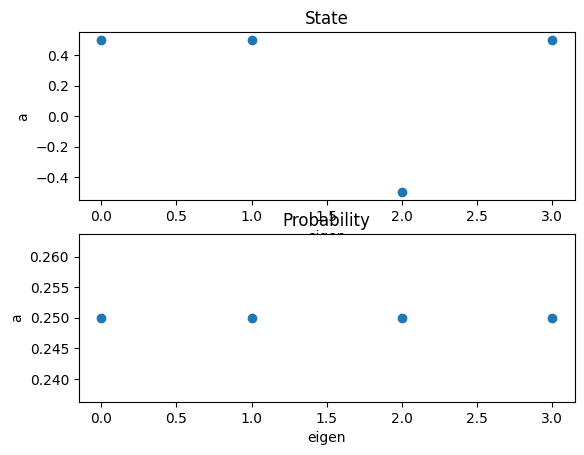

In [ ]:
# Let's do some toy examples

p = np.array([1/2 , 1/2 , -1/2, 1/2])

plt.subplot(2,1,1)
plt.plot(p, 'o')
plt.ylabel('a')
plt.xlabel('eigen')
plt.title('State')

plt.subplot(2,1,2)
plt.plot(np.abs(p)**2, 'o')
plt.ylabel('a')
plt.xlabel('eigen')
plt.title('Probability')

In [ ]:
np.conjugate(3 + 4j)

(3-4j)

In [ ]:
np.abs(3 - 4j)

5.0

In [ ]:
U = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

print('Identity?\n', U @ np.conjugate(U).T)

ucheck = np.sum( ( U @ np.conjugate(U).T - np.identity(4) )**2 )

print('0?\n',  ucheck)

eps = 1e-12
if np.abs( ucheck ) < eps:
    print('Yes. It is unitary.')
else:
    print('No! It is NOT unitary.')

pnew = U @ p

print('New p\n', pnew)

print('New probabilities\n', np.abs(pnew)**2)

Identity?
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
0?
 0.0
Yes. It is unitary.
New p
 [ 0.5  0.5 -0.5  0.5]
New probabilities
 [0.25 0.25 0.25 0.25]


Find $U$ such that
$U | p \rangle$ has its amplitude max where $| p \rangle$ has negative amplitude.

In [ ]:
# Try

U = np.array([[1, 0, 0, 0],
              [0, -1j, 0, 0],
              [0, 0, 1/np.sqrt(2)*(1 + 1j), 0],
              [0, 0, 0, 1]])

print('Identity?\n', U @ np.conjugate(U).T)

ucheck = np.sum( ( U @ np.conjugate(U).T - np.identity(4) )**2 )

print('0?\n',  ucheck)

eps = 1e-12
if np.abs( ucheck ) < eps:
    print('Yes. It is unitary.')
else:
    print('No! It is NOT unitary.')

pnew = U @ p

print('New p\n', pnew)

print('New probabilities\n', np.abs(pnew)**2)

Identity?
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
0?
 (4.930380657631324e-32+0j)
Yes. It is unitary.
New p
 [ 0.5       +0.j          0.        -0.5j        -0.35355339-0.35355339j
  0.5       +0.j        ]
New probabilities
 [0.25 0.25 0.25 0.25]


### Intuition

Try invert each element around the average

In [ ]:
a = np.mean(p)
a

0.25

[-0.25 -0.25  0.75 -0.25]
[0.0625 0.0625 0.5625 0.0625]


Text(0.5, 1.0, 'Probability')

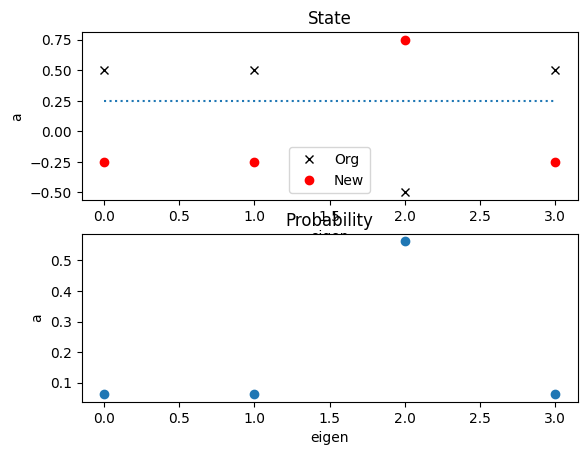

In [ ]:
pnext = a - p

print(pnext)

prob = np.abs(pnext)**2
print(prob)

plt.subplot(2,1,1)
plt.plot(p, 'kx', label='Org')
plt.plot(pnext, 'ro', label='New')
plt.ylabel('a')
plt.xlabel('eigen')
plt.title('State')
plt.legend()

plt.plot(a*np.ones(4), ':')

plt.subplot(2,1,2)
plt.plot(prob, 'o')
plt.ylabel('a')
plt.xlabel('eigen')
plt.title('Probability')



In [ ]:
print(np.sum(prob))

0.75


Arh! it is not a valid operation. It does not preserve the total probability.


pnext = [0. 0. 1. 0.]
prob = [0. 0. 1. 0.]
sum = 1.0


Text(0.5, 1.0, 'Probability')

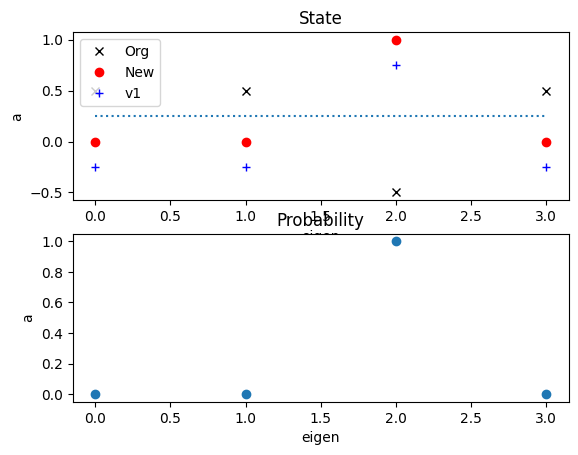

In [ ]:
p1 = a - p
pnext = 2*a - p
print('pnext =', pnext)

prob = np.abs(pnext)**2
print('prob =', prob)
print('sum =', np.sum(prob))

plt.subplot(2,1,1)
plt.plot(p, 'kx', label='Org')
plt.plot(pnext, 'ro', label='New')
plt.plot(p1, 'b+', label='v1')
plt.ylabel('a')
plt.xlabel('eigen')
plt.title('State')
plt.legend()

plt.plot(a*np.ones(4), ':')

plt.subplot(2,1,2)
plt.plot(prob, 'o')
plt.ylabel('a')
plt.xlabel('eigen')
plt.title('Probability')

In [ ]:
# Average as a matrix

A = 1/4*np.ones((4,4))
A

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [ ]:
print('p =', p)

print('A @ p =', A @ p)

p = [ 0.5  0.5 -0.5  0.5]
A @ p = [0.25 0.25 0.25 0.25]


> Since there are more other states than the winning state,
> the average will be much closer to the other states.
>
> Inversion around the average swings the high amplitudes of the other states down and the very low amplitude (low into the negative region)
> of the winning state up.

### Inversion about the mean

_Inversion about the mean_ is to convert this phase flip into change in magnitude of the _probability amplitudes_.

Inversion about the mean can be done using matrix operations as:

\begin{align}
| p' \rangle &= 2 \overbrace{A | p \rangle}^{\mbox{The mean}} - | p \rangle \\
&= 2 A | p \rangle - | p \rangle \\
&= (2 A - I) | p \rangle
\end{align}

where $A$ is an average operator or the average matrix.

> For averaging $m = 4$ elements,
> $A = \frac{1}{4} \begin{bmatrix}1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1
\end{bmatrix}$

For averaging $m = 2^n$ elements (for $n$ qubits),
$$A = \frac{1}{2^n} \begin{bmatrix}1 & 1 & \cdots & 1 \\
1 & 1 & \cdots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \cdots & 1
\end{bmatrix}$$

> Is this $2 A - I$ unitary?
>
> Let $B \equiv 2 A - I$
>
>
> \begin{align}
B = 2 A - I &= \begin{bmatrix}
\frac{2}{2^n} - 1  & \frac{2}{2^n}  & \cdots & \frac{2}{2^n}  \\
\frac{2}{2^n}  & \frac{2}{2^n} - 1  & \cdots & \frac{2}{2^n}  \\
\vdots & \vdots & \ddots & \vdots \\
\frac{2}{2^n}  & \frac{2}{2^n}  & \cdots & \frac{2}{2^n} - 1
\end{bmatrix}
\end{align}
>
> $B$ is real and symmetry: $B^\dagger = B$.
>
> \begin{align}
B^\dagger B = B B^\dagger &= (2 A - I) \cdot (2 A - I) \\
&= 4 A A - 2 A - 2 A + I = 4 A^2 - 4 A + I
\end{align}

>> Consider $A A = A^2$.
>>
>> Let $A$ be $m \times m$ matrix (for averaging $m$ components).
>>
>> \begin{align}
A^2 &=
\frac{1}{m}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
1 & 1 & \cdots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \cdots & 1 \\
\end{bmatrix}
\cdot
\frac{1}{m}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
1 & 1 & \cdots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \cdots & 1 \\
\end{bmatrix} \\
&= \frac{1}{m^2}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
1 & 1 & \cdots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \cdots & 1 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
1 & 1 & \cdots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \cdots & 1 \\
\end{bmatrix}
\end{align}

>> Let $P = E E = E^2$ where $E$ is an $m \times m$ matrix with each element being 1.
>>
>> $p_{ij} = \sum_{k = 1}^m e_{i,k} e_{k, j}$ where $e_{i,j}$ is the element of $E$ at row $i$ and column $j$.
>>
>> With all $e_{ij} = 1$, thus
>> $p_{ij} = \sum_{k = 1}^m 1 = m$.


>> Therefore,
>> \begin{align}
A^2 &= \frac{1}{m^2}
\begin{bmatrix}
m & m & \cdots & m \\
m & m & \cdots & m \\
\vdots & \vdots & \ddots & \vdots \\
m & m & \cdots & m \\
\end{bmatrix} \\
&= \frac{1}{m}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
1 & 1 & \cdots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \cdots & 1 \\
\end{bmatrix} = A
\end{align}
>>
>> Hence, $A A = A^2 = A$.


> Back to $B = 2 A - I$ and an issue of whether $B$ is unitary.
>
> \begin{align}
> B^\dagger B &= 4 A^2 - 4 A + I \\
&= 4 A - 4 A + I = I
\end{align}
>
> Hence, $2 A - I$ is always unitary.
>
> **A unitary operator is a valid quantum operator.**

> How many times should these operations be done?
>
> $\sqrt{2^n}$ times. If we do it more than that, the process will "overcook" the numbers.

> For the case of $n = 2$, it is $\sqrt{2^2} = 2$ times.

# The show

> We have seen it work in 2-qubit case.
> Let's see it again.

## Toy example

![image.png](attachment:aa6fd47b-0ab4-4866-8865-5240ba371319.png)

In [ ]:
# Let's do some toy examples
# n = 2
# m = 2**2 = 4 states

n = 2
m = 2**n
win_id = 2 # 10

# Put into superposition
phi2 = 1/np.sqrt(m) * np.ones(m)
phi2

array([0.5, 0.5, 0.5, 0.5])

In [ ]:
# Phase inversion
phi3a = phi2.copy()
phi3a[win_id] *= -1

phi3a

array([ 0.5,  0.5, -0.5,  0.5])

In [ ]:
# Inversion about the mean

# Average matrix
A = 1/m * np.ones((m, m))
A

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [ ]:
B = 2 * A - np.identity(m)
B

array([[-0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5,  0.5],
       [ 0.5,  0.5, -0.5,  0.5],
       [ 0.5,  0.5,  0.5, -0.5]])

In [ ]:
phi3b = B @ phi3a
phi3b

array([0., 0., 1., 0.])

## Qiskit

In [1]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=12b54a9b1c92693b675f1c93009cbeed43533619a5fa05bf796cd053d425179c
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [2]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.6 MB/s eta 0:00:00


In [11]:
import numpy as np

In [3]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


### Uf

Caution!!!

$U_f$ changes only $y$.
It does not change $\mathbf{x}$.

Whatever we have done with $\mathbf{x}$,
we have to restore it.

In [104]:
# Make the Uf
Uf = QuantumCircuit(3, name='Uf')

# 00

# Uf.x([0,1])
# Uf.ccx(0,1,2)
# Uf.x([0,1])

# 01
Uf.x(1)
Uf.ccx(0,1,2)
Uf.x(1)

# 10
# Uf.x(0)
# Uf.ccx(0,1,2)
# Uf.x(0)


Uf.to_gate() # Make a gate named 'oracle'


Instruction(name='Uf', num_qubits=3, num_clbits=0, params=[])

### Test Uf: one at a time

{'101': 1024}


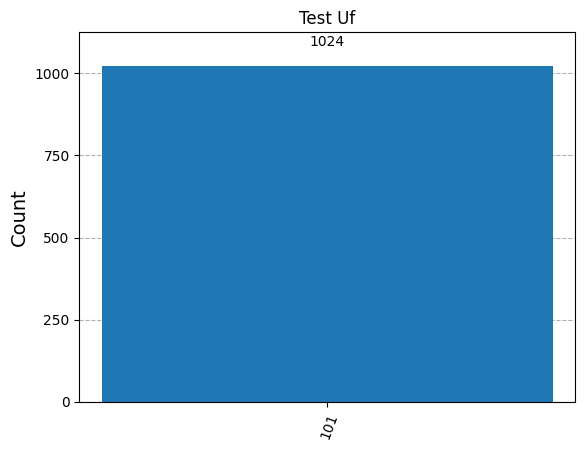

In [106]:
qc = QuantumCircuit(3,3)
# qc.h([0,1])

# Test 00 / the winning state will get y = 1, otherwise y = 0
# Do nothing

# Test 01
qc.x(0)

# Test 10
# qc.x(1)

# Test 11
# qc.x([0,1])


qc.append(Uf,[0,1,2])

qc.measure([0,1,2],[0,1,2])

# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Test Uf')

### Grover's algorithm

In [56]:
import qiskit.quantum_info as qi

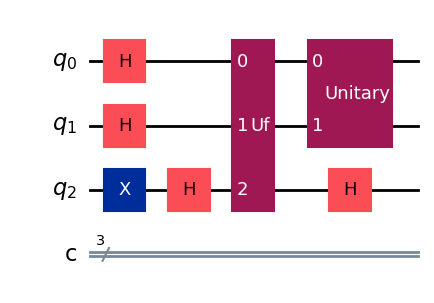

In [141]:
qc = QuantumCircuit(3,3)

# Step 1. Start with |0>, default

# Step 2. Apply H

qc.h([1,0])

# Step 3. Do phase inversion

qc.x(2) # make y = |1>

qc.h(2)
qc.append(Uf,[0,1,2])

# Step 4. Apply inversion about the mean

# Average matrix
m = 4
A = 1/m * np.ones((m, m))
B = 2 * A - np.identity(m)

Bgate = qi.Operator(B)

qc.append(Bgate, [0,1])


# Tie the loose end
# Make y = 1
qc.h(2)

qc.draw('mpl')

#### Check with ```StatevectorSimulator```

In [142]:
from qiskit_aer import StatevectorSimulator

# Transpile for simulator
simulator = StatevectorSimulator()
grover_circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(grover_circ).result()


# Get state vectors
sv = result.get_statevector()

np.around(sv, 2)

array([0.-0.j, 0.+0.j, 0.-0.j, 0.-0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j])

In [143]:
print('max =', np.argmax(sv))
print('min =', np.argmin(sv))

max = 5
min = 6


In [136]:
np.around(sv, 2) < 0

array([False, False, False, False, False,  True, False, False])

In [137]:
np.around(sv, 2)[:4] < 0

array([False, False, False, False])

```sv``` = [q2; q1, q0]
: 000, 001, 010, 011, 100, 101, 110, 111


#### Run it

{'101': 1024}


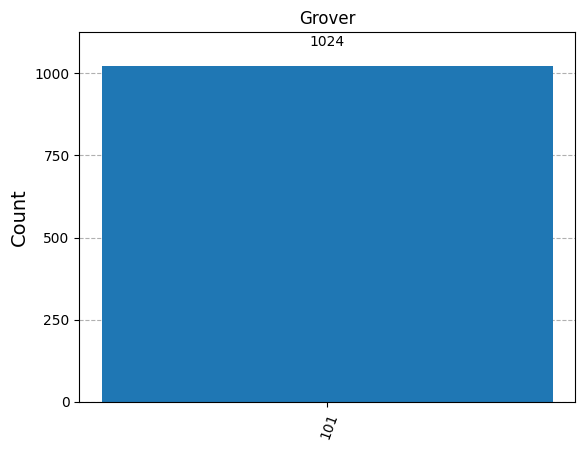

In [144]:
qc.measure([0,1,2],[0,1,2])

# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Grover')

#### Try with different winning state

In [153]:
# Make the Uf
Uf = QuantumCircuit(3, name='Uf')

# 00

# Uf.x([0,1])
# Uf.ccx(0,1,2)
# Uf.x([0,1])

# 01
# Uf.x(1)
# Uf.ccx(0,1,2)
# Uf.x(1)

# 10
# Uf.x(0)
# Uf.ccx(0,1,2)
# Uf.x(0)

# 11
Uf.ccx(0,1,2)

Uf.to_gate() # Make a gate named 'oracle'

Instruction(name='Uf', num_qubits=3, num_clbits=0, params=[])

In [154]:
qc = QuantumCircuit(3,3)

# Step 1. Start with |0>, default

# Step 2. Apply H

qc.h([1,0])

# Step 3. Do phase inversion

qc.x(2) # make y = |1>

qc.h(2)
qc.append(Uf,[0,1,2])

# Step 4. Apply inversion about the mean

# Average matrix
m = 4
A = 1/m * np.ones((m, m))
B = 2 * A - np.identity(m)

Bgate = qi.Operator(B)

qc.append(Bgate, [0,1])


# Tie the loose end
# Make y = 1
qc.h(2)

{'111': 1024}


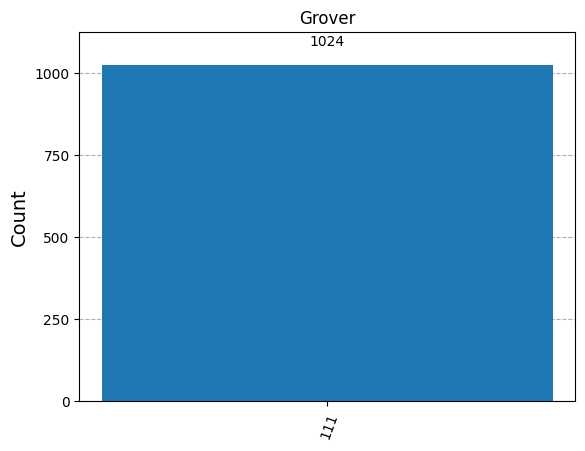

In [155]:
qc.measure([0,1,2],[0,1,2])

# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Grover')

#### Repeat

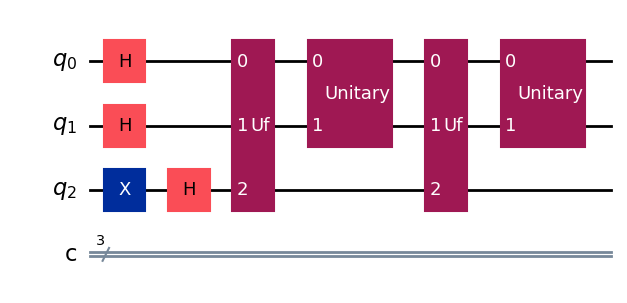

In [145]:
qc = QuantumCircuit(3,3)

# Step 1. Start with |0>, default

# Step 2. Apply H

qc.h([1,0])

# Step 3. Do phase inversion

qc.x(2) # make y = |1>

qc.h(2)
qc.append(Uf,[0,1,2])

# # Step 4. Apply inversion about the mean

# # Average matrix
m = 4
A = 1/m * np.ones((m, m))
B = 2 * A - np.identity(m)

Bgate = qi.Operator(B)

qc.append(Bgate, [0,1])

# Step 5. Repeat

qc.append(Uf,[0,1,2])

qc.append(Bgate, [0,1])

qc.draw('mpl')

{'100': 128, '101': 145, '110': 124, '011': 115, '111': 150, '001': 110, '000': 140, '010': 112}


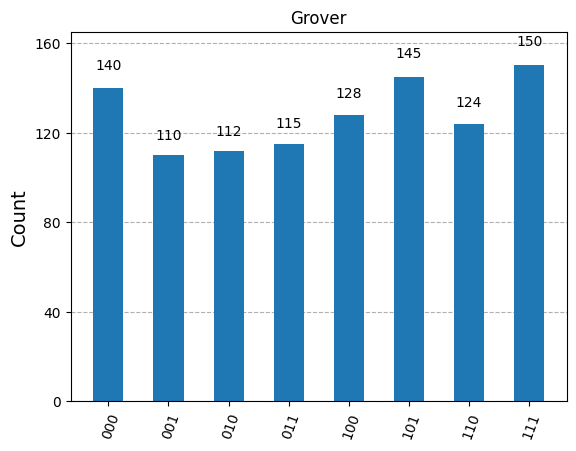

In [146]:
qc.measure([0,1,2],[0,1,2])

# 2. Transpile
simulator = AerSimulator()
circ = transpile(qc, simulator)

# 3. Run
job = simulator.run(circ)

# 4. Read the result
result = job.result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Grover')

**!!!Overcook!!!**

# The happiness

**The end!**

# The glossary

* **Bra-ket notation**:

  Quantum state is often represented using bra-ket notation, e.g., state $| \psi \rangle$ (read "ket psi").

* **Qunantum state**:

  Quantum state $| \psi \rangle$ can be represented

  
  * as a combination of eigenstates/basis states: $| \psi \rangle = \sum_i a_i | \psi_i \rangle$
    E.g., $|+\rangle = \frac{1}{\sqrt{2}}| 0 \rangle + \frac{1}{\sqrt{2}}| 1 \rangle$.
     
  * as a $m$-size vector: $| \psi \rangle = [a_1, a_2, \ldots, a_m]^T$ where $m$ is a number of eigenstates.

    E.g., $|+\rangle = \left[\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}\right]^T$.

* **Probability amplitude**:

  The coefficients of eigenstates representing a state: $| \psi \rangle = \sum_i a_i | \psi_i \rangle$, those $a_i$'s are all probability amplitudes.

  * When we measure a state, its state will collapse to one of its eigenstates with probability $P(|\psi_i \rangle) = |a_i|^2$.

    E.g., When the qubit is in $|+\rangle = \left[\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}\right]^T$ when we measure with respect to $| 0 \rangle$ and $| 1 \rangle$ bases, we will get state $| 0 \rangle$ half of the time, $\left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2}$.

* **Hadamard gate**:

  Hadamard gate is an operator that can put a basis state into a superposition state.

  * For 2 qubits, $H = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix}$

    E.g., if state $| \psi \rangle$ is in the ground state: $| \psi \rangle = |0\rangle = [1, 0]^T$, the state after applying Hadamard $| \psi' \rangle = H | \psi \rangle = [\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}]^T$.

* **Tensor product**:

  Tensor product is a mathematical operation for combining two or more quantum systems into a single, composite system.

  E.g., when we have 2 qubits, $|q_0 \rangle = | 0 \rangle$ and $| q_1 \rangle = | 0 \rangle$ and apply hadamard to $q_0$ and identity to $q_1$, this will result in

  * $|q_0' \rangle = \frac{1}{\sqrt{2}}|0 \rangle + \frac{1}{\sqrt{2}}|1 \rangle$

  * $|q_1' \rangle = |0 \rangle$

  or we can see them collectively as

  \begin{align}
    | \psi' \rangle &= |0 \rangle ,(\frac{1}{\sqrt{2}}|0 \rangle + \frac{1}{\sqrt{2}}|1 \rangle) \\
    &= \frac{1}{\sqrt{2}}|00 \rangle + \frac{1}{\sqrt{2}}|01 \rangle \\
    &= \left[\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}, 0, 0 \right]^T .
    \end{align}
   


  This is like we have a two-qubit operator
  \begin{align}
  B &= I \otimes H \\
  &=
 \begin{bmatrix} 1 & 0 \\
  0 & 1
  \end{bmatrix}
  \otimes
  \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1\\ 1 & -1 \end{bmatrix} \\
  &=
\frac{1}{\sqrt{2}}
  \begin{bmatrix}
  1 & 1 & 0 & 0 \\
  1 & -1 & 0 & 0 \\
  0 & 0 & 1 & 1 \\
  0 & 0 & 1 & -1 \\  
  \end{bmatrix}
  \end{align}

  and
  \begin{align}
  B | \psi \rangle &=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
  1 & 1 & 0 & 0 \\
  1 & -1 & 0 & 0 \\
  0 & 0 & 1 & 1 \\
  0 & 0 & 1 & -1 \\  
  \end{bmatrix}
\cdot
\begin{bmatrix}
1 \\ 0 \\ 0 \\ 0
\end{bmatrix} \\
&= \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\ 1 \\ 0 \\ 0
\end{bmatrix}
  \end{align}
and this is equal to what we have done using combination of bases, $| \psi' \rangle$.

* **Gate operation** and **matrix operation**:

  Gate operation can be viewed as matrix operation.

* **Unitary operator**:

  A valid evolution to a quantum system has to be unitary operation. Unitary operator can be applied to the state to achieve unitary operation.
  A unitary operator can be viewed as a unitary matrix, $U$, where $U U^\dagger = U^\dagger U = I$.

* **Phase kickback**:

  Phase kickback is a phenomenon in quantum computing where the phase of a controlled qubit is transferred to its controlling qubit.